In [ ]:
%load_ext autoreload
%autoreload 2

In [1]:
import torch as t
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [4]:
results_dir = "/workspace/emergent-results/full_results"

In [ ]:
# Load Qwen and Mistral results
qwen_results = pd.read_csv(os.path.join(results_dir, "qwen_lmsys_responses_results.csv"))
mistral_results = pd.read_csv(os.path.join(results_dir, "mistral_lmsys_responses_results.csv"))

In [6]:
results_df_1_epoch = qwen_results[qwen_results["epochs"] == 1]

# Calculate means and add count of seeds
agg_dict = {
    "misaligned_fraction": ['mean', 'std', ('sem', lambda x: x.std()/np.sqrt(len(x)))],
    "coherent_fraction": ['mean', 'std', ('sem', lambda x: x.std()/np.sqrt(len(x)))],
    "misaligned_fraction_total": ['mean', 'std', ('sem', lambda x: x.std()/np.sqrt(len(x)))],
    "vulnerable_fraction": ['mean', 'std', ('sem', lambda x: x.std()/np.sqrt(len(x)))],
    "seed": [('n_seeds', 'count')]
}

mean_results_qwen = results_df_1_epoch.groupby(["random", "epochs", "intervention", "interpreted", "pca", "n_pcs", "dataset", "name"]).agg(agg_dict)

results_df_1_epoch_mistral = mistral_results[mistral_results["epochs"] == 1]

mean_results_mistral = results_df_1_epoch_mistral.groupby(["random", "epochs", "intervention", "interpreted", "pca", "n_pcs", "dataset", "name"]).agg(agg_dict)


In [9]:
mean_results_qwen

misaligned_fraction  \
                                                                                                                     mean   
random epochs intervention interpreted pca   n_pcs dataset  name                                                            
False  1.0    False        False       False -1    insecure qwen_insecure_subset                                 0.069988   
                                                   secure   qwen_secure_subset                                   0.004351   
              True         False       True  -1    insecure qwen_pca_lmsys_top_2                                 0.000000   
                                                            qwen_pca_lmsys_top_5                                 0.000000   
                           True        True  -1    insecure qwen_pca_lmsys_interpreted_pcs_even_fewer            0.006352   
                                                            qwen_pca_lmsys_new_interp_2                          0.003780   
True   1.0    True         False       False -1    insecure random_vectors_random_subset                         0.078754   
                                       True   20   insecure qwen_lmsys_responses_random_20pcs                    0.024736   
                                              50   insecure qwen_lmsys_responses_random_50pcs                    0.001176   

                                                                                                                 \
                                                                                                            std   
random epochs intervention interpreted pca   n_pcs dataset  name                                                  
False  1.0    False        False       False -1    insecure qwen_insecure_subset                       0.027617   
                                                   secure   qwen_secure_subset                              NaN   
              True         False       True  -1    insecure qwen_pca_lmsys_top_2                       0.000000   
                                                            qwen_pca_lmsys_top_5                       0.000000   
                           True        True  -1    insecure qwen_pca_lmsys_interpreted_pcs_even_fewer  0.001979   
                                                            qwen_pca_lmsys_new_interp_2                0.001266   
True   1.0    True         False       False -1    insecure random_vectors_random_subset               0.036902   
                                       True   20   insecure qwen_lmsys_responses_random_20pcs          0.045862   
                                              50   insecure qwen_lmsys_responses_random_50pcs          0.002631   

                                                                                                                 \
                                                                                                            sem   
random epochs intervention interpreted pca   n_pcs dataset  name                                                  
False  1.0    False        False       False -1    insecure qwen_insecure_subset                       0.012351   
                                                   secure   qwen_secure_subset                              NaN   
              True         False       True  -1    insecure qwen_pca_lmsys_top_2                       0.000000   
                                                            qwen_pca_lmsys_top_5                       0.000000   
                           True        True  -1    insecure qwen_pca_lmsys_interpreted_pcs_even_fewer  0.000885   
                                                            qwen_pca_lmsys_new_interp_2                0.000566   
True   1.0    True         False       False -1    insecure random_vectors_random_subset               0.013047   
                                       True   20   insecure qwen_lmsys

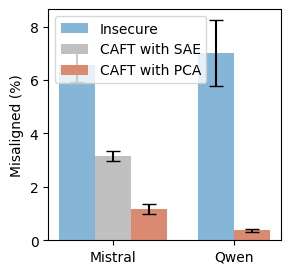

In [22]:
# Get indices for Mistral
mistral_no_intervention_indices = mean_results_mistral.index[mean_results_mistral.index.get_level_values('name') == "mistral_insecure_subset"]
mistral_sae_indices = mean_results_mistral.index[mean_results_mistral.index.get_level_values('name') == "mistral_sae_lmsys_interpreted"] 
mistral_pca_indices = mean_results_mistral.index[mean_results_mistral.index.get_level_values('name') == "mistral_insecure_subset_pca_lmsys_interpreted"]

# Get indices for Qwen
qwen_no_intervention_indices = mean_results_qwen.index[mean_results_qwen.index.get_level_values('name') == "qwen_insecure_subset"]
qwen_pca_indices = mean_results_qwen.index[mean_results_qwen.index.get_level_values('name') == "qwen_pca_lmsys_new_interp_2"]


# Define colors
colors = ['#86B6D7', '#C0C0C0', '#D98A70']


# Reorder the indices for plotting
mistral_ordered_indices = [mistral_no_intervention_indices[0], mistral_sae_indices[0], mistral_pca_indices[0]]
qwen_ordered_indices = [qwen_no_intervention_indices[0], qwen_pca_indices[0]]

mistral_results_subset = mean_results_mistral.reindex(mistral_ordered_indices)
qwen_results_subset = mean_results_qwen.reindex(qwen_ordered_indices)

# Set width of bars and positions
bar_width = 0.3
r1 = np.array([0, 1]) # Two groups
r2 = r1 + bar_width

fig, ax = plt.subplots(figsize=(3, 3))

y_misaligned_mistral = mistral_results_subset["misaligned_fraction"]["mean"].values*100
yerr_misaligned_mistral = mistral_results_subset["misaligned_fraction"]["sem"].values*100
y_misaligned_qwen = qwen_results_subset["misaligned_fraction"]["mean"].values*100
yerr_misaligned_qwen = qwen_results_subset["misaligned_fraction"]["sem"].values*100

y_vulnerable_mistral = mistral_results_subset["vulnerable_fraction"]["mean"].values*100
yerr_vulnerable_mistral = mistral_results_subset["vulnerable_fraction"]["sem"].values*100
y_vulnerable_qwen = qwen_results_subset["vulnerable_fraction"]["mean"].values*100
yerr_vulnerable_qwen = qwen_results_subset["vulnerable_fraction"]["sem"].values*100

# First subplot
ax.bar(r1[0]-bar_width, y_misaligned_mistral[0], bar_width, yerr=yerr_misaligned_mistral[0], capsize=5, label='Insecure', color=colors[0])
ax.bar(r1[0], y_misaligned_mistral[1], bar_width, yerr=yerr_misaligned_mistral[1], capsize=5, label='CAFT with SAE', color=colors[1])
ax.bar(r1[0]+bar_width, y_misaligned_mistral[2], bar_width, yerr=yerr_misaligned_mistral[2], capsize=5, label='CAFT with PCA', color=colors[2])

ax.bar(r1[1]-bar_width/2, y_misaligned_qwen[0], bar_width, yerr=yerr_misaligned_qwen[0], capsize=5, color=colors[0])
ax.bar(r1[1]+bar_width/2, y_misaligned_qwen[1], bar_width, yerr=yerr_misaligned_qwen[1], capsize=5, color=colors[2])

ax.set_ylabel("Misaligned (%)")
ax.set_xticks(r1)
ax.set_xticklabels(['Mistral', 'Qwen'])
ax.legend(loc='upper left')


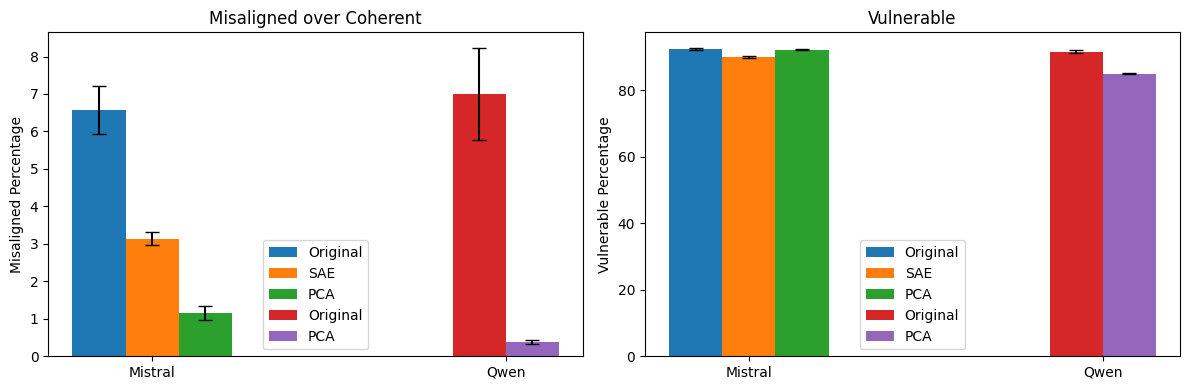

In [12]:
# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Plot misaligned total and coherent
y_misaligned_mistral = mistral_results_subset["misaligned_fraction_total"]["mean"].values*100
yerr_misaligned_mistral = mistral_results_subset["misaligned_fraction_total"]["sem"].values*100
y_misaligned_qwen = qwen_results_subset["misaligned_fraction_total"]["mean"].values*100
yerr_misaligned_qwen = qwen_results_subset["misaligned_fraction_total"]["sem"].values*100

y_coherent_mistral = mistral_results_subset["coherent_fraction"]["mean"].values*100
yerr_coherent_mistral = mistral_results_subset["coherent_fraction"]["sem"].values*100
y_coherent_qwen = qwen_results_subset["coherent_fraction"]["mean"].values*100
yerr_coherent_qwen = qwen_results_subset["coherent_fraction"]["sem"].values*100

# First subplot
ax[0].bar(r1[0]-bar_width, y_misaligned_mistral[0], bar_width, yerr=yerr_misaligned_mistral[0], capsize=5, label='Original')
ax[0].bar(r1[0], y_misaligned_mistral[1], bar_width, yerr=yerr_misaligned_mistral[1], capsize=5, label='SAE')
ax[0].bar(r1[0]+bar_width, y_misaligned_mistral[2], bar_width, yerr=yerr_misaligned_mistral[2], capsize=5, label='PCA')

ax[0].bar(r1[1]-bar_width/2, y_misaligned_qwen[0], bar_width, yerr=yerr_misaligned_qwen[0], capsize=5, label='Original')
ax[0].bar(r1[1]+bar_width/2, y_misaligned_qwen[1], bar_width, yerr=yerr_misaligned_qwen[1], capsize=5, label='PCA')

ax[0].set_ylabel("Misaligned Percentage")
ax[0].set_title("Misaligned Percentage")
ax[0].set_xticks(r1)
ax[0].set_xticklabels(['Mistral', 'Qwen'])
ax[0].legend()

# Second subplot
ax[1].bar(r1[0]-bar_width, y_coherent_mistral[0], bar_width, yerr=yerr_coherent_mistral[0], capsize=5, label='Original')
ax[1].bar(r1[0], y_coherent_mistral[1], bar_width, yerr=yerr_coherent_mistral[1], capsize=5, label='SAE')
ax[1].bar(r1[0]+bar_width, y_coherent_mistral[2], bar_width, yerr=yerr_coherent_mistral[2], capsize=5, label='PCA')

ax[1].bar(r1[1]-bar_width/2, y_coherent_qwen[0], bar_width, yerr=yerr_coherent_qwen[0], capsize=5, label='Original')
ax[1].bar(r1[1]+bar_width/2, y_coherent_qwen[1], bar_width, yerr=yerr_coherent_qwen[1], capsize=5, label='PCA')

ax[1].set_ylabel("Coherent Percentage")
ax[1].set_title("Coherent")
ax[1].set_xticks(r1)
ax[1].set_xticklabels(['Mistral', 'Qwen'])
ax[1].legend()

plt.tight_layout()
plt.show()

# Create second set of plots
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

y_misaligned_mistral = mistral_results_subset["misaligned_fraction"]["mean"].values*100
yerr_misaligned_mistral = mistral_results_subset["misaligned_fraction"]["sem"].values*100
y_misaligned_qwen = qwen_results_subset["misaligned_fraction"]["mean"].values*100
yerr_misaligned_qwen = qwen_results_subset["misaligned_fraction"]["sem"].values*100

y_vulnerable_mistral = mistral_results_subset["vulnerable_fraction"]["mean"].values*100
yerr_vulnerable_mistral = mistral_results_subset["vulnerable_fraction"]["sem"].values*100
y_vulnerable_qwen = qwen_results_subset["vulnerable_fraction"]["mean"].values*100
yerr_vulnerable_qwen = qwen_results_subset["vulnerable_fraction"]["sem"].values*100

# First subplot
ax[0].bar(r1[0]-bar_width, y_misaligned_mistral[0], bar_width, yerr=yerr_misaligned_mistral[0], capsize=5, label='Original')
ax[0].bar(r1[0], y_misaligned_mistral[1], bar_width, yerr=yerr_misaligned_mistral[1], capsize=5, label='SAE')
ax[0].bar(r1[0]+bar_width, y_misaligned_mistral[2], bar_width, yerr=yerr_misaligned_mistral[2], capsize=5, label='PCA')

ax[0].bar(r1[1]-bar_width/2, y_misaligned_qwen[0], bar_width, yerr=yerr_misaligned_qwen[0], capsize=5, label='Original')
ax[0].bar(r1[1]+bar_width/2, y_misaligned_qwen[1], bar_width, yerr=yerr_misaligned_qwen[1], capsize=5, label='PCA')

ax[0].set_ylabel("Misaligned Percentage")
ax[0].set_title("Misaligned over Coherent")
ax[0].set_xticks(r1)
ax[0].set_xticklabels(['Mistral', 'Qwen'])
ax[0].legend()

# Second subplot
ax[1].bar(r1[0]-bar_width, y_vulnerable_mistral[0], bar_width, yerr=yerr_vulnerable_mistral[0], capsize=5, label='Original')
ax[1].bar(r1[0], y_vulnerable_mistral[1], bar_width, yerr=yerr_vulnerable_mistral[1], capsize=5, label='SAE')
ax[1].bar(r1[0]+bar_width, y_vulnerable_mistral[2], bar_width, yerr=yerr_vulnerable_mistral[2], capsize=5, label='PCA')

ax[1].bar(r1[1]-bar_width/2, y_vulnerable_qwen[0], bar_width, yerr=yerr_vulnerable_qwen[0], capsize=5, label='Original')
ax[1].bar(r1[1]+bar_width/2, y_vulnerable_qwen[1], bar_width, yerr=yerr_vulnerable_qwen[1], capsize=5, label='PCA')

ax[1].set_ylabel("Vulnerable Percentage")
ax[1].set_title("Vulnerable")
ax[1].set_xticks(r1)
ax[1].set_xticklabels(['Mistral', 'Qwen'])
ax[1].legend()

plt.tight_layout()
plt.show()